**Part 2 Logistic Regression**

In [ ]:
# I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
penguindf = pd.read_csv('penguins_lter.csv')
penguindf

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [ ]:
penguindf.isnull().sum(axis=0)

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [ ]:
penguindf.drop('Comments', inplace=True, axis=1)

In [ ]:
penguindf = penguindf.dropna(subset=['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Sex'])

In [ ]:
penguindf.fillna(value=penguindf['Delta 15 N (o/oo)'].mean(), inplace=True)
penguindf.fillna(value=penguindf['Delta 13 C (o/oo)'].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
penguindf.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,63.805389,43.994311,17.160479,201.014970,4209.056886,8.737794,-24.859898
std,40.246924,5.460521,1.967909,14.022175,804.836129,0.545063,5.329366
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,30.250000,39.500000,15.600000,190.000000,3550.000000,8.309078,-26.300325
50%,58.500000,44.500000,17.300000,197.000000,4050.000000,8.681410,-25.806100
75%,95.750000,48.575000,18.700000,213.000000,4793.750000,9.151967,-25.010613
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,8.737794


In [ ]:
penguindf.shape

(334, 16)

In [ ]:
penguindf.dtypes

studyName               object
Sample Number            int64
Species                 object
Region                  object
Island                  object
Stage                   object
Individual ID           object
Clutch Completion       object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
dtype: object

In [ ]:
penguindf[['Species','Island','Sex']] = penguindf[['Species','Island','Sex']].astype('category')
print(penguindf.dtypes)

studyName                object
Sample Number             int64
Species                category
Region                   object
Island                 category
Stage                    object
Individual ID            object
Clutch Completion        object
Date Egg                 object
Culmen Length (mm)      float64
Culmen Depth (mm)       float64
Flipper Length (mm)     float64
Body Mass (g)           float64
Sex                    category
Delta 15 N (o/oo)       float64
Delta 13 C (o/oo)       float64
dtype: object


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
normalizeddf = penguindf.copy()

column = ['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']
normalizeddf[column] = (normalizeddf[column] - normalizeddf[column].min()) / (normalizeddf[column].max() - normalizeddf[column].min())    
  
display(normalizeddf)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,0.254545,0.666667,0.152542,0.291667,MALE,0.461965,1.000000
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,0.269091,0.511905,0.237288,0.305556,FEMALE,0.550450,0.064995
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,0.298182,0.583333,0.389831,0.152778,FEMALE,0.307537,0.047139
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,0.167273,0.738095,0.355932,0.208333,FEMALE,0.473964,0.047384
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,0.261818,0.892857,0.305085,0.263889,MALE,0.431532,0.048117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,PAL0910,119,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,No,12/1/09,0.549091,0.071429,0.711864,0.618056,FEMALE,0.150273,0.022742
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,0.534545,0.142857,0.728814,0.597222,FEMALE,0.325630,0.024617
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,0.665455,0.309524,0.847458,0.847222,MALE,0.279730,0.027334
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,0.476364,0.202381,0.677966,0.694444,FEMALE,0.254993,0.025138


In [ ]:
penguindf.shape

(334, 16)

In [ ]:
normalizeddf.shape

(334, 16)

In [ ]:
normalizeddf[['Region','Clutch Completion','Stage']] = normalizeddf[['Region','Clutch Completion','Stage']].astype('category')
X = normalizeddf[['Species', 'Region', 'Island', 'Stage','Sex',
       'Clutch Completion', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']]

In [ ]:
X['Species'] = X['Species'].cat.codes
X['Region'] = X['Region'].cat.codes
X['Island'] = X['Island'].cat.codes
X['Stage'] = X['Stage'].cat.codes
X['Sex'] = X['Sex'].cat.codes-1
X['Clutch Completion'] = X['Clutch Completion'].cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
X.head()

,Species,Region,Island,Stage,Sex,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,0,2,0,1,1,0.254545,0.666667,0.152542,0.291667,0.461965,1.000000
1,0,0,2,0,0,1,0.269091,0.511905,0.237288,0.305556,0.550450,0.064995
2,0,0,2,0,0,1,0.298182,0.583333,0.389831,0.152778,0.307537,0.047139
4,0,0,2,0,0,1,0.167273,0.738095,0.355932,0.208333,0.473964,0.047384
5,0,0,2,0,1,1,0.261818,0.892857,0.305085,0.263889,0.431532,0.048117


In [ ]:
X.shape

(334, 12)

In [ ]:
ind = np.random.rand(len(X)) < 0.8

train = X[ind]

test = X[~ind]


In [ ]:
train

,Species,Region,Island,Stage,Sex,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
1,0,0,2,0,0,1,0.269091,0.511905,0.237288,0.305556,0.550450,0.064995
2,0,0,2,0,0,1,0.298182,0.583333,0.389831,0.152778,0.307537,0.047139
4,0,0,2,0,0,1,0.167273,0.738095,0.355932,0.208333,0.473964,0.047384
5,0,0,2,0,1,1,0.261818,0.892857,0.305085,0.263889,0.431532,0.048117
6,0,0,2,0,0,0,0.247273,0.559524,0.152542,0.256944,0.649738,0.050356
...,...,...,...,...,...,...,...,...,...,...,...,...
338,2,0,0,0,0,0,0.549091,0.071429,0.711864,0.618056,0.150273,0.022742
340,2,0,0,0,0,1,0.534545,0.142857,0.728814,0.597222,0.325630,0.024617
341,2,0,0,0,1,1,0.665455,0.309524,0.847458,0.847222,0.279730,0.027334
342,2,0,0,0,0,1,0.476364,0.202381,0.677966,0.694444,0.254993,0.025138


In [ ]:
X_train = train.iloc[:,[0,1,2,3,5,6,7,8,9,10,11]]
Y_train = train.iloc[:,4]

X_test = test.iloc[:,[0,1,2,3,5,6,7,8,9,10,11]]
Y_test = test.iloc[:,4]

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape,Y_test.shape)

(260, 11) (74, 11) (260,) (74,)


In [ ]:
X_train.head()

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
1,0,0,2,0,1,0.269091,0.511905,0.237288,0.305556,0.550450,0.064995
2,0,0,2,0,1,0.298182,0.583333,0.389831,0.152778,0.307537,0.047139
4,0,0,2,0,1,0.167273,0.738095,0.355932,0.208333,0.473964,0.047384
5,0,0,2,0,1,0.261818,0.892857,0.305085,0.263889,0.431532,0.048117
6,0,0,2,0,0,0.247273,0.559524,0.152542,0.256944,0.649738,0.050356


In [ ]:
class LogitRegression() :

  def __init__(self, learning_rate, iters, df) :
    self.learning_rate = learning_rate
    self.iters = iters
    np.random.seed(69)
    self.W = np.random.uniform(0,1,len(df.columns))
    self.b = 0

  def sigmoid(self,z):
    sig = 1/(1+math.e**(-z)) 
    return sig

  def fit(self,N,X_train):
    ypred = self.sigmoid(np.dot(X_train,self.W)+self.b)
    return ypred
  
  def loss (self,y,Y_train):
    return np.mean(pow((y - Y_train),2))
  
  def gradient_descent(self,pred,X_train,Y_train,N):
    delta = pred - Y_train
    dW = (np.dot(delta.T,X_train))/N
    # print("W",self.W)
    # print("")
    # print("Updated weight",dW)
    # print("")
    updatesb = np.mean(pred-Y_train)
    #print("new w", self.W+dW)
    return self.W - dW, self.b - updatesb
  
  def train(self,X_train,Y_train,N):
    loss = []
    accuracy = []
    for i in range(self.iters):
      # print(self.W, self.b)
      ypred = self.sigmoid(np.dot(X_train,self.W)+self.b)
      # print(self.ypred)
      # print(self.loss(ypred,Y_train))
      loss.append(self.loss(ypred,Y_train))
      accuracy.append(1 - self.loss(ypred,Y_train))
      self.W = self.gradient_descent(ypred,X_train,Y_train,N)[0]
      self.b = self.gradient_descent(ypred,X_train,Y_train,N)[1]
    print("Loss",min(loss))
    print("Best Accuracy",max(accuracy))
    print("Weight",self.W)
     
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(121)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    ax2 = fig.add_subplot(122)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    ax.plot(loss)
    ax2.plot(accuracy)
    plt.show()

In [ ]:
learning_rate = 1e-6
iterations = 10000

model = LogitRegression(learning_rate, iterations, X_train)
ypred = model.fit(X_train.shape[0],X_train)
yloss = model.loss(ypred,Y_train)
gradient = model.gradient_descent(ypred,X_train,Y_train,X_train.shape[0])
ypred.shape

(260,)

For 10,000 iterations with Learning rate = 1e-6 (0.000001)

Loss 0.056377057004152985
Best Accuracy 0.943622942995847
Weight [-5.56283266  0.80906772 -0.27478626  0.78940926  1.5142517  13.33764845
  8.87860201  3.50696969 24.5948693   4.23840994  1.45322884]


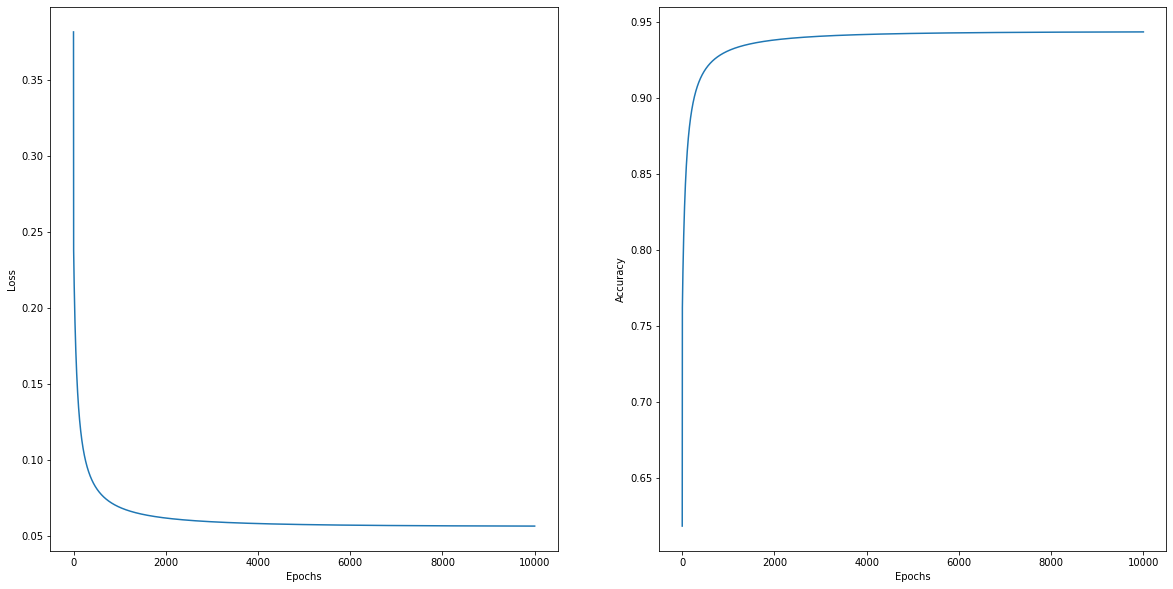

In [ ]:
learning_rate = 1e-6
iterations = 10000

model = LogitRegression(learning_rate, iterations, X_train)
train = model.train(X_train,Y_train,X_train.shape[0])

For 1000 iterations with Learning rate = 1e-9 (0.000000001)

Loss 0.06878518535194757
Best Accuracy 0.9312148146480524
Weight [-2.89279009  0.80906772 -0.46310694  0.78940926  0.0703079   6.66899445
  5.65002224  3.30558136 10.91595706  1.3072675   1.0669664 ]


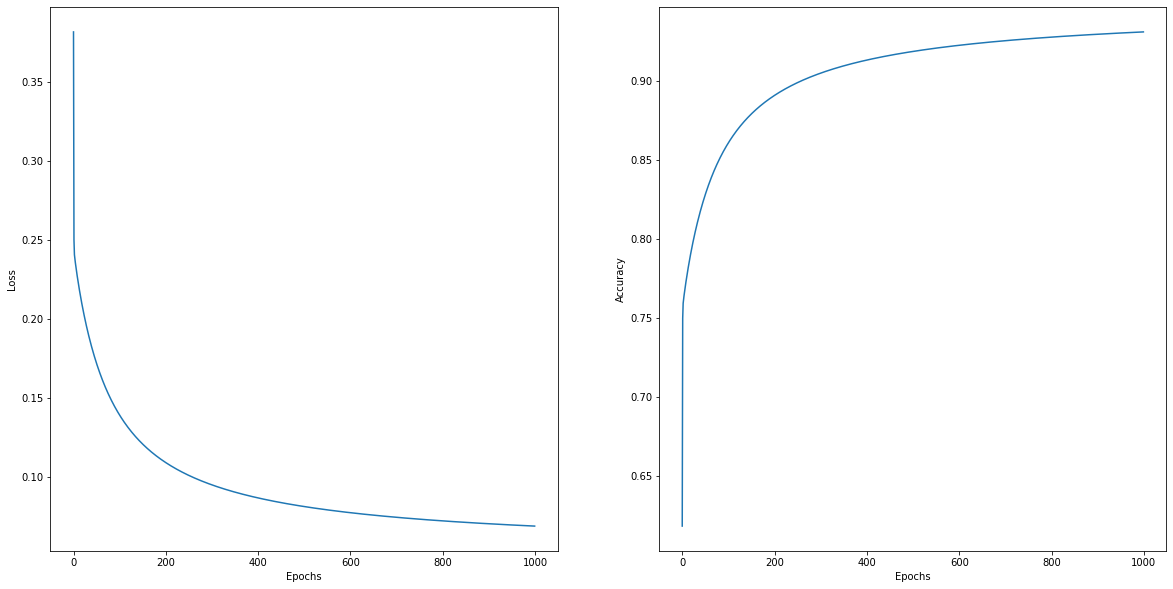

In [ ]:
learning_rate = 1e-9
iterations = 1000

model = LogitRegression(learning_rate, iterations, X_train)
train = model.train(X_train,Y_train,X_train.shape[0])

For 10,000 iterations with Learning rate = 1e-3 (0.001)

Loss 0.056377057004152985
Best Accuracy 0.943622942995847
Weight [-5.56283266  0.80906772 -0.27478626  0.78940926  1.5142517  13.33764845
  8.87860201  3.50696969 24.5948693   4.23840994  1.45322884]


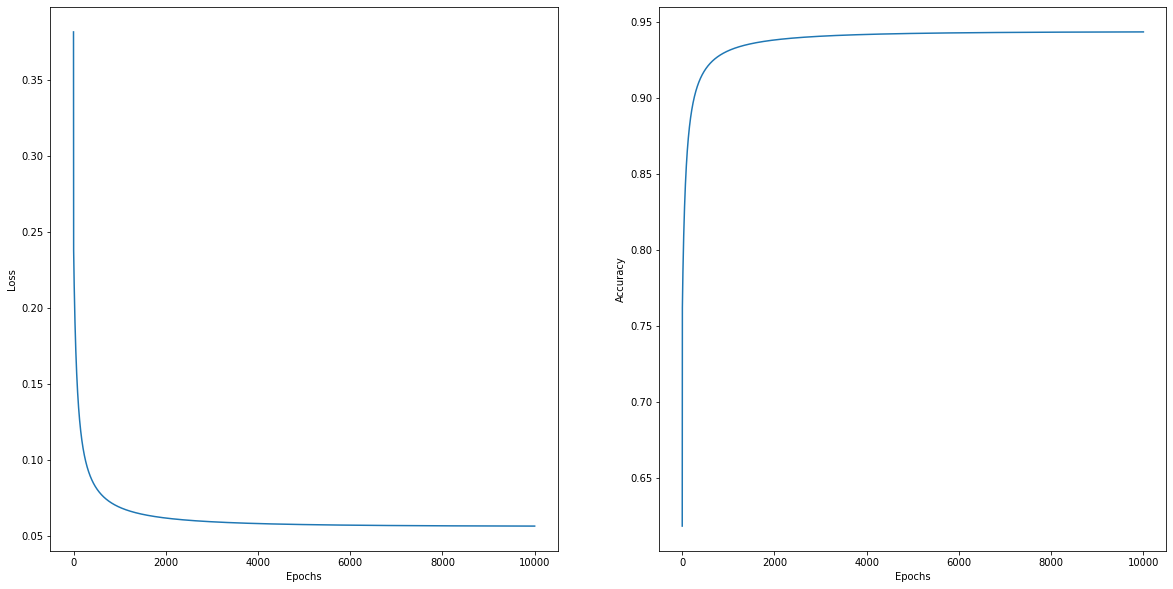

In [ ]:
learning_rate = 1e-3
iterations = 10000

model = LogitRegression(learning_rate, iterations, X_train)
train = model.train(X_train,Y_train,X_train.shape[0])

For 10,000 iterations with Learning rate = 0.1

Loss 0.056377057004152985
Best Accuracy 0.943622942995847
Weight [-5.56283266  0.80906772 -0.27478626  0.78940926  1.5142517  13.33764845
  8.87860201  3.50696969 24.5948693   4.23840994  1.45322884]


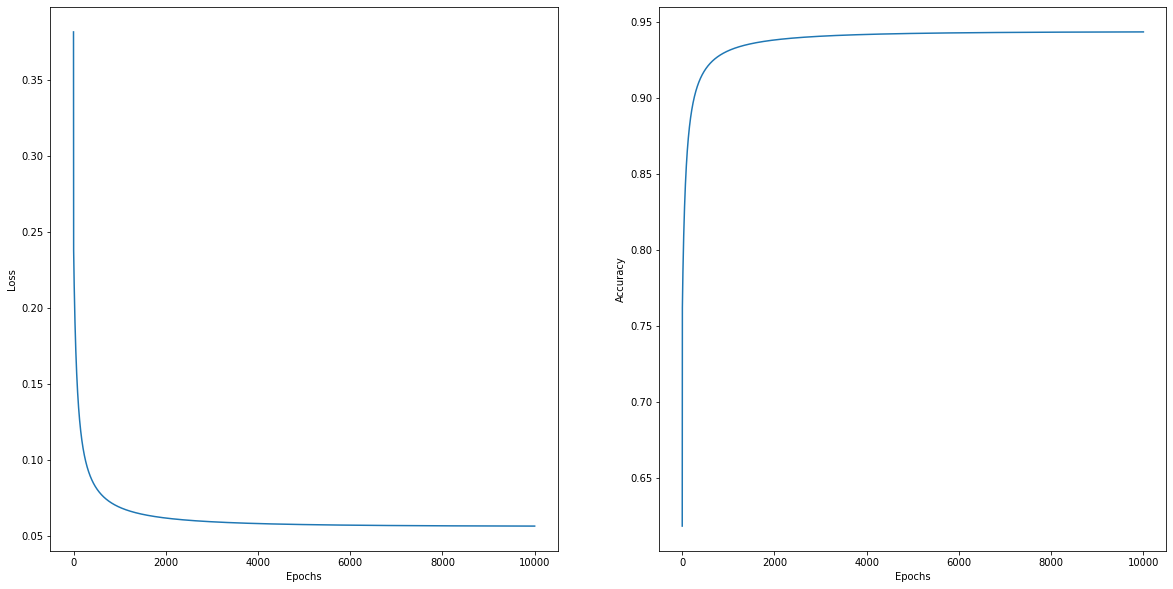

In [ ]:
learning_rate = 0.1
iterations = 10000

model = LogitRegression(learning_rate, iterations, X_train)
train = model.train(X_train,Y_train,X_train.shape[0])